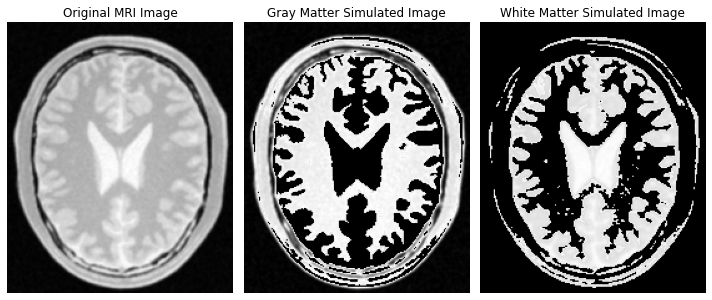

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gray_matter_transform(pval):
    if pval < 5:
        return 0
    elif pval < 178:
        return (pval * 1.4045-7.0225)
    elif pval < 185:
        return (pval * 0.7143+87.8546)
    else:
        return 0


def white_matter_transform(pval):
    if pval < 175:
        return 0
    elif pval < 185:
        return (pval * 2) - 80
    else:
        return (pval * 0.7857)+109.65

# Load the grayscale MRI image
mri_scan_raw = cv2.imread('BrainProtonDensitySlice9.png', cv2.IMREAD_GRAYSCALE)
image=cv2.GaussianBlur(mri_scan_raw, (3, 3), 0)

# Apply intensity transformation for gray matter
gray_matter_image = np.vectorize(gray_matter_transform)(image)

# Apply intensity transformation for white matter
white_matter_image = np.vectorize(white_matter_transform)(image)

# Display the images using matplotlib
plt.figure(figsize=(10, 6))

# Original MRI image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')

# Gray matter simulated image
plt.subplot(1, 3, 2)
plt.imshow(gray_matter_image, cmap='gray')
plt.title('Gray Matter Simulated Image')
plt.axis('off')

# White matter simulated image
plt.subplot(1, 3, 3)
plt.imshow(white_matter_image, cmap='gray')
plt.title('White Matter Simulated Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Plot the intensity transfer functions

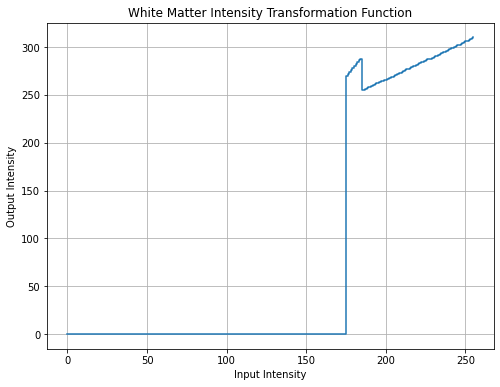

In [2]:
input_values = np.arange(0, 256)

# Apply the intensity transformation function to the input values
output_values = np.vectorize(white_matter_transform)(input_values)

# Create a step plot of the intensity transformation function
plt.figure(figsize=(8, 6))
plt.step(input_values, output_values, where='post')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('White Matter Intensity Transformation Function')
plt.grid(True)
plt.show()

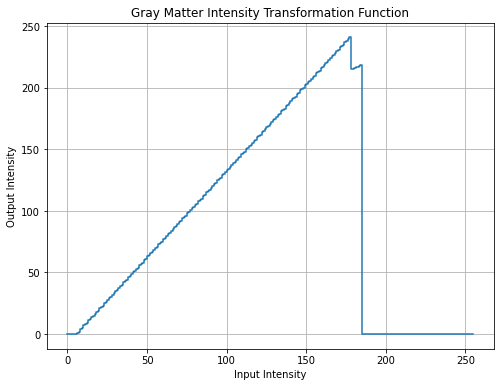

In [3]:
input_values = np.arange(0, 256)

# Apply the intensity transformation function to the input values
output_values = np.vectorize(gray_matter_transform)(input_values)

# Create a step plot of the intensity transformation function
plt.figure(figsize=(8, 6))
plt.step(input_values, output_values, where='post')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Gray Matter Intensity Transformation Function')
plt.grid(True)
plt.show()


### Extra Code for identifying intensity threshold

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interactive_output
# Load the MRI scan (grayscale image)
image_path = 'BrainProtonDensitySlice9.png'
mri_scan_raw = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image data to a suitable data type
mri_scan_raw = mri_scan_raw.astype(np.uint8)

mri_scan =cv2.GaussianBlur(mri_scan_raw, (3, 3), 0)

# Define the function to update images
def update_images(gray_threshold, white_threshold):
    clear_output(wait=True)  # Clear the previous output
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    gray_matter_image = np.copy(mri_scan)
    gray_matter_image[(gray_matter_image < gray_threshold) | (gray_matter_image >= white_threshold)] = 0
    
    white_matter_image = np.copy(mri_scan)
    white_matter_image[(white_matter_image < white_threshold) | (white_matter_image >= 255)] = 0
    
    axes[0].imshow(mri_scan, cmap='gray')
    axes[0].set_title('Original MRI Scan')
    axes[0].axis('off')
    
    axes[1].imshow(gray_matter_image, cmap='gray')
    axes[1].set_title('Enhanced Gray Matter')
    axes[1].axis('off')
    
    axes[2].imshow(white_matter_image, cmap='gray')
    axes[2].set_title('Enhanced White Matter')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

# Create interactive sliders
s_thresh_gray = widgets.IntSlider(value=10, min=0, max=255, description='Gray Matter:')
s_thresh_white = widgets.IntSlider(value=180, min=0, max=255, description='White Matter:')

# Create the interactive_output
out = interactive_output(update_images, {'gray_threshold': s_thresh_gray, 'white_threshold': s_thresh_white})

# Display the sliders and images
display(s_thresh_gray, s_thresh_white, out)

IntSlider(value=10, description='Gray Matter:', max=255)

IntSlider(value=180, description='White Matter:', max=255)

Output()